In [1]:
# %matplotlib inline
# %load_ext autoreload
# %autoreload 2
# %matplotlib notebook
import pandas as pd
import numpy as np
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib qt
# %matplotlib notebook
# %matplotlib widget

In [2]:
# load the datasets
df_static = pd.read_csv("datasets/Master Projekt/StaticSensorReadings.csv")
df_mobile = pd.read_csv("datasets/Master Projekt/MobileSensorReadings.csv")
df_location = pd.read_csv("datasets/Master Projekt/StaticSensorLocations.csv")

In [3]:
# merge the static dataset with location dataset
df_static_complete = df_static.merge(df_location, how='inner', on='Sensor-id', sort=True)
# make a copy of the static dataset bcz we need it unchanged later for live plot
df_static_complete_copy = df_static_complete.copy()

In [4]:
# reorder the columns in order to be the same as static dataset
df_mobile = df_mobile[['Timestamp','Sensor-id','Value','Units','Lat','Long',' User-id']]
df_mobile_copy = df_mobile.copy()

In [5]:
# convert the Timestamp column to datetime format
df_static_complete['Timestamp'] = pd.to_datetime(df_static_complete['Timestamp'])
df_mobile['Timestamp'] = pd.to_datetime(df_mobile['Timestamp'])

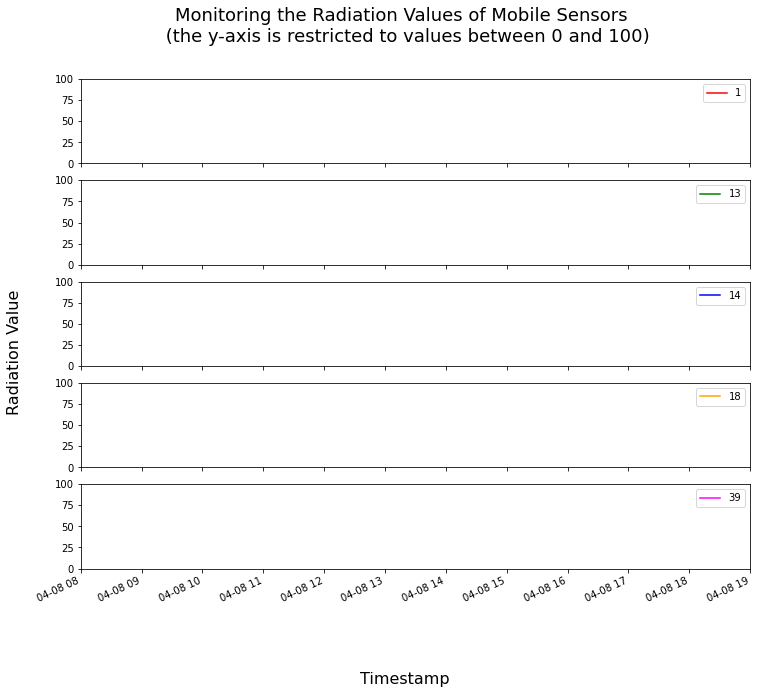

In [7]:
# live plot to monitor the radiation value of mobile sensors

# %matplotlib widget
# %matplotlib qt
# %matplotlib notebook
%matplotlib inline
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')
import datetime
import matplotlib.dates as mdates
import matplotlib.dates as md
# %matplotlib notebook
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sensors = [1,13,14,18,39]
# 29,34,22
time_start = '2020-04-08 08:00:00'
time_end = '2020-04-08 19:00:00'

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, sharex=True, sharey=True)
fig.suptitle('Monitoring the Radiation Values of Mobile Sensors \n (the y-axis is restricted to values between 0 and 100)', size=18)
fig.set_size_inches(12, 10, forward=True)
fig.autofmt_xdate()

fig.text(0.5, 0.04, 'Timestamp', ha='center', size=16)
fig.text(0.04, 0.5, 'Radiation Value', va='center', rotation='vertical', size=16)
########################################## sensor1

sensor_id = sensors[0]

line1, = ax1.plot([], [], color='red', label=sensor_id)
ax1.legend()
ax1.set_xlim(datetime.datetime(2020,4,8,8,0), datetime.datetime(2020, 4, 8,19,0))
ax1.set_ylim(0, 100)
# ax1.set_xlabel('Timestamp')
plt.xticks(rotation=25)
ax1=plt.gca()
# xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
# ax1.xaxis.set_major_formatter(xfmt)

# initialize the line plot
def init1():
    line1.set_data([], [])
    return line1,

# specify the time boundaries to be plotted
partial_data1 = df_mobile_copy.loc[(df_mobile_copy['Timestamp'] >= time_start) & 
                                 (df_mobile_copy['Timestamp'] < time_end)] 

# make a list out of the dataset values
time1 = partial_data1[partial_data1['Sensor-id']==sensor_id].filter(items=['Timestamp']).values.tolist()
value1 = partial_data1[partial_data1['Sensor-id']==sensor_id].filter(items=['Value']).values.tolist()

# remove the [] around each value of the list
x1=[j[0] for j in time1]
y1=[j[0] for j in value1]

def animate1(i): # animation update function
    
    # put the values into the line function to plot all values from the beginning of the list until the frame number
    line1.set_data(x1[1:i], y1[1:i])
    return line1,

anim1 = FuncAnimation(fig, animate1, init_func=init1, frames=len(x1), interval=0, blit=True,repeat=False)


# ############################################ sensor2

sensor_id = sensors[1]

line2, = ax2.plot([], [], color='green', label=sensor_id )
ax2.legend()
ax2.set_xlim(datetime.datetime(2020,4,8,8,0), datetime.datetime(2020, 4, 8,19,0))
ax2.set_ylim(0, 100)
# ax2.set_xlabel('Timestamp')
plt.xticks(rotation=25)
ax2=plt.gca()
# xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
# ax2.xaxis.set_major_formatter(xfmt)

# initialize the line plot
def init2():
    line2.set_data([], [])
    return line2,

# specify the time boundaries to be plotted
partial_data2 = df_mobile_copy.loc[(df_mobile_copy['Timestamp'] >= time_start) & 
                                 (df_mobile_copy['Timestamp'] < time_end)] 

# make a list out of the dataset values
time2 = partial_data2[partial_data2['Sensor-id']==sensor_id].filter(items=['Timestamp']).values.tolist()
value2 = partial_data2[partial_data2['Sensor-id']==sensor_id].filter(items=['Value']).values.tolist()

# remove the [] around each value of the list
x2=[j[0] for j in time2]
y2=[j[0] for j in value2]

def animate2(i): # animation update function
    
    # put the values into the line function to plot all values from the beginning of the list until the frame number
    line2.set_data(x2[1:i], y2[1:i])
    return line2,

anim2 = FuncAnimation(fig, animate2, init_func=init2, frames=len(x2), interval=0, blit=True,repeat=False)

########################################## sensor3

sensor_id = sensors[2]

line3, = ax3.plot([], [], color='blue', label=sensor_id)
ax3.legend()
ax3.set_xlim(datetime.datetime(2020,4,8,8,0), datetime.datetime(2020, 4, 8,19,0))
ax3.set_ylim(0, 100)
# ax3.set_xlabel('Timestamp')
plt.xticks(rotation=25)
ax3=plt.gca()
# xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
# ax3.xaxis.set_major_formatter(xfmt)

# initialize the line plot
def init3():
    line3.set_data([], [])
    return line3,
# specify the time boundaries to be plotted
partial_data3 = df_mobile_copy.loc[(df_mobile_copy['Timestamp'] >= time_start) & 
                                 (df_mobile_copy['Timestamp'] < time_end)] 

# make a list out of the dataset values
time3 = partial_data3[partial_data3['Sensor-id']==sensor_id].filter(items=['Timestamp']).values.tolist()
value3 = partial_data3[partial_data3['Sensor-id']==sensor_id].filter(items=['Value']).values.tolist()

# remove the [] around each value of the list
x3=[j[0] for j in time3]
y3=[j[0] for j in value3]

def animate3(i): # animation update function
    
    # put the values into the line function to plot all values from the beginning of the list until the frame number
    line3.set_data(x3[1:i], y3[1:i])
    return line3,

anim3 = FuncAnimation(fig, animate3, init_func=init3, frames=len(x3), interval=0, blit=True,repeat=False)

##################################################### sensor4

sensor_id = sensors[3]

line4, = ax4.plot([], [], color='orange', label=sensor_id )
ax4.legend()
ax4.set_xlim(datetime.datetime(2020,4,8,8,0), datetime.datetime(2020, 4, 8,19,0))
ax4.set_ylim(0, 100)
# ax2.set_xlabel('Timestamp')
plt.xticks(rotation=25)
ax4=plt.gca()
# xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
# ax2.xaxis.set_major_formatter(xfmt)

# initialize the line plot
def init4():
    line4.set_data([], [])
    return line4,

# specify the time boundaries to be plotted
partial_data4 = df_mobile_copy.loc[(df_mobile_copy['Timestamp'] >= time_start) & 
                                 (df_mobile_copy['Timestamp'] < time_end)] 

# make a list out of the dataset values
time4 = partial_data4[partial_data4['Sensor-id']==sensor_id].filter(items=['Timestamp']).values.tolist()
value4 = partial_data4[partial_data4['Sensor-id']==sensor_id].filter(items=['Value']).values.tolist()

# remove the [] around each value of the list
x4=[j[0] for j in time4]
y4=[j[0] for j in value4]

def animate4(i): # animation update function
    
    # put the values into the line function to plot all values from the beginning of the list until the frame number
    line4.set_data(x4[1:i], y4[1:i])
    return line4,

anim4 = FuncAnimation(fig, animate4, init_func=init4, frames=len(x4), interval=0, blit=True,repeat=False)

########################################## sensor5

sensor_id = sensors[4]

line5, = ax5.plot([], [], color='magenta', label=sensor_id)
ax5.legend()
ax5.set_xlim(datetime.datetime(2020,4,8,8,0), datetime.datetime(2020, 4, 8,19,0))
ax5.set_ylim(0, 100)
# ax1.set_xlabel('Timestamp')
plt.xticks(rotation=25)
ax5=plt.gca()
# xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
# ax1.xaxis.set_major_formatter(xfmt)

# initialize the line plot
def init5():
    line5.set_data([], [])
    return line5,

# specify the time boundaries to be plotted
partial_data5 = df_mobile_copy.loc[(df_mobile_copy['Timestamp'] >= time_start) & 
                                 (df_mobile_copy['Timestamp'] < time_end)] 

# make a list out of the dataset values
time5 = partial_data5[partial_data5['Sensor-id']==sensor_id].filter(items=['Timestamp']).values.tolist()
value5 = partial_data5[partial_data5['Sensor-id']==sensor_id].filter(items=['Value']).values.tolist()

# remove the [] around each value of the list
x5=[j[0] for j in time5]
y5=[j[0] for j in value5]

def animate5(i): # animation update function
    
    # put the values into the line function to plot all values from the beginning of the list until the frame number
    line5.set_data(x5[1:i], y5[1:i])
    return line5,

anim5 = FuncAnimation(fig, animate5, init_func=init5, frames=len(x5), interval=0, blit=True,repeat=False)



plt.show()

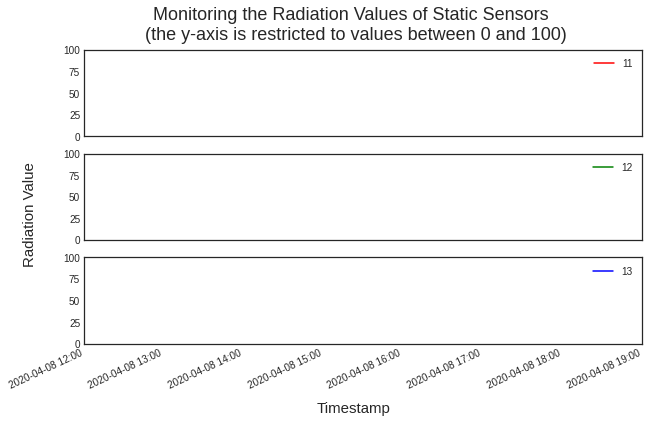

In [8]:
# live plot to monitor the radiation value of static sensors

# %matplotlib qt
%matplotlib inline

from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-white')
import datetime
import matplotlib.dates as mdates
import matplotlib.dates as md
# %matplotlib notebook
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sensors = [11,12,13]
time_start = '2020-04-08 12:00:00'
time_end = '2020-04-08 19:00:00'

fig, (ax1, ax2, ax3) = plt.subplots(len(sensors),1, sharex=True, sharey=True)
fig.suptitle('Monitoring the Radiation Values of Static Sensors \n (the y-axis is restricted to values between 0 and 100)', size=18)
fig.set_size_inches(10, 6, forward=True)
fig.autofmt_xdate()

fig.text(0.5, 0.04, 'Timestamp', ha='center', size=15)
fig.text(0.04, 0.5, 'Radiation Value', va='center', rotation='vertical', size=15)
########################################## sensor1

sensor_id = sensors[0]

line1, = ax1.plot([], [], color='red', label=sensor_id)
ax1.legend()
ax1.set_xlim(datetime.datetime(2020,4,8,12,0), datetime.datetime(2020, 4, 8,19,0))
ax1.set_ylim(0, 100)
plt.xticks(rotation=25)
ax1=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax1.xaxis.set_major_formatter(xfmt)

# initialize the line plot
def init1():
    line1.set_data([], [])
    return line1,

# specify the time boundaries to be plotted
partial_data1 = df_static_complete_copy.loc[(df_static_complete_copy['Timestamp'] >= time_start) & 
                                 (df_static_complete_copy['Timestamp'] < time_end)] 

# make a list out of the dataset values
time1 = partial_data1[partial_data1['Sensor-id']==sensor_id].filter(items=['Timestamp']).values.tolist()
value1 = partial_data1[partial_data1['Sensor-id']==sensor_id].filter(items=['Value']).values.tolist()

# remove the [] around each value of the list
x1=[j[0] for j in time1]
y1=[j[0] for j in value1]

def animate1(i): # animation update function
    
    # put the values into the line function to plot all values from the beginning of the list until the frame number
    line1.set_data(x1[1:i], y1[1:i])
    return line1,

anim1 = FuncAnimation(fig, animate1, init_func=init1, frames=len(x1), interval=0, blit=True,repeat=False)


# ############################################ sensor2

sensor_id = sensors[1]

line2, = ax2.plot([], [], color='green', label=sensor_id )
ax2.legend()
ax2.set_xlim(datetime.datetime(2020,4,8,12,0), datetime.datetime(2020, 4, 8,19,0))
ax2.set_ylim(0, 100)
plt.xticks(rotation=25)
ax2=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax2.xaxis.set_major_formatter(xfmt)

# initialize the line plot
def init2():
    line2.set_data([], [])
    return line2,

# specify the time boundaries to be plotted
partial_data2 = df_static_complete_copy.loc[(df_static_complete_copy['Timestamp'] >= time_start) & 
                                 (df_static_complete_copy['Timestamp'] < time_end)] 

# make a list out of the dataset values
time2 = partial_data2[partial_data2['Sensor-id']==sensor_id].filter(items=['Timestamp']).values.tolist()
value2 = partial_data2[partial_data2['Sensor-id']==sensor_id].filter(items=['Value']).values.tolist()

# remove the [] around each value of the list
x2=[j[0] for j in time2]
y2=[j[0] for j in value2]

def animate2(i): # animation update function
    
    # put the values into the line function to plot all values from the beginning of the list until the frame number
    line2.set_data(x2[1:i], y2[1:i])
    return line2,

anim2 = FuncAnimation(fig, animate2, init_func=init2, frames=len(x2), interval=0, blit=True,repeat=False)

########################################## sensor3

sensor_id = sensors[2]

line3, = ax3.plot([], [], color='blue', label=sensor_id)
ax3.legend()
ax3.set_xlim(datetime.datetime(2020,4,8,12,0), datetime.datetime(2020, 4, 8,19,0))
ax3.set_ylim(0, 100)
plt.xticks(rotation=25)
ax3=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax3.xaxis.set_major_formatter(xfmt)

# initialize the line plot
def init3():
    line3.set_data([], [])
    return line3,

# specify the time boundaries to be plotted
partial_data3 = df_static_complete_copy.loc[(df_static_complete_copy['Timestamp'] >= time_start) & 
                                 (df_static_complete_copy['Timestamp'] < time_end)] 

# make a list out of the dataset values
time3 = partial_data3[partial_data3['Sensor-id']==sensor_id].filter(items=['Timestamp']).values.tolist()
value3 = partial_data3[partial_data3['Sensor-id']==sensor_id].filter(items=['Value']).values.tolist()

# remove the [] around each value of the list
x3=[j[0] for j in time3]
y3=[j[0] for j in value3]

def animate3(i): # animation update function
    
    # put the values into the line function to plot all values from the beginning of the list until the frame number
    line3.set_data(x3[1:i], y3[1:i])
    return line3,

anim3 = FuncAnimation(fig, animate3, init_func=init3, frames=len(x3), interval=0, blit=True,repeat=False)

########################################## sensor4

# sensor_id = sensors[3]

# line4, = ax4.plot([], [], color='orange', label=sensor_id)
# ax4.legend()
# ax4.set_xlim(datetime.datetime(2020,4,8,15,0), datetime.datetime(2020, 4, 8,19,0))
# ax4.set_ylim(0, 100)
# plt.xticks(rotation=25)
# ax4=plt.gca()
# xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
# ax4.xaxis.set_major_formatter(xfmt)

# # initialize the line plot
# def init4():
#     line4.set_data([], [])
#     return line4,

# # specify the time boundaries to be plotted
# partial_data4 = df_static_complete_copy.loc[(df_static_complete_copy['Timestamp'] >= time_start) & 
#                                  (df_static_complete_copy['Timestamp'] < time_end)] 

# # make a list out of the dataset values
# time4 = partial_data4[partial_data4['Sensor-id']==sensor_id].filter(items=['Timestamp']).values.tolist()
# value4 = partial_data4[partial_data4['Sensor-id']==sensor_id].filter(items=['Value']).values.tolist()

# # remove the [] around each value of the list
# x4=[j[0] for j in time4]
# y4=[j[0] for j in value4]

# def animate4(i): # animation update function
    
#     # put the values into the line function to plot all values from the beginning of the list until the frame number
#     line4.set_data(x4[1:i], y4[1:i])
#     return line4,

# anim4 = FuncAnimation(fig, animate4, init_func=init4, frames=len(x4), interval=0, blit=True,repeat=False)



plt.show()